In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data , raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

## Train|test split

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## MLP NETWORK

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "input_layer"))
    model.add(Dense(32, name = "hidden1", activation = "relu"))# change to he initalizer
    model.add(Dense(32, name = "hidden2", activation = "relu"))
    model.add(Dense(1, name ="Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 32)                992       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(scaled_X_train, y_train, epochs= 500, validation_split=.2, verbose=1)

Train on 364 samples, validate on 91 samples
Epoch 1/500
364/364 [==============================] - 1s 1ms/sample - loss: 0.5995 - val_loss: 0.4899
Epoch 2/500
364/364 [==============================] - 0s 123us/sample - loss: 0.4223 - val_loss: 0.3551
Epoch 3/500
364/364 [==============================] - 0s 127us/sample - loss: 0.3051 - val_loss: 0.2673
Epoch 4/500
364/364 [==============================] - 0s 115us/sample - loss: 0.2305 - val_loss: 0.2118
Epoch 5/500
364/364 [==============================] - 0s 114us/sample - loss: 0.1812 - val_loss: 0.1727
Epoch 6/500
364/364 [==============================] - 0s 104us/sample - loss: 0.1463 - val_loss: 0.1493
Epoch 7/500
364/364 [==============================] - 0s 110us/sample - loss: 0.1235 - val_loss: 0.1343
Epoch 8/500
364/364 [==============================] - 0s 116us/sample - loss: 0.1063 - val_loss: 0.1233
Epoch 9/500
364/364 [==============================] - 0s 117us/sample - loss: 0.0940 - val_loss: 0.1152
Epoch 10/500

In [14]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.599532,0.489863
1,0.422254,0.355143
2,0.305104,0.267318
3,0.230452,0.211835
4,0.181234,0.172656


<AxesSubplot:>

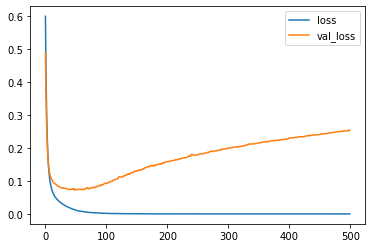

In [15]:
df_loss.plot()
#Clear overfitting as validation loss increases after a certain amount of epochs

In [16]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 32)                992       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit()